In [1]:
##########################
# 配置运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot

# matplotlib 对中文的支持及保存为 pdf 格式
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8, 5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 设置 numpy 的输出精度, 并且阻止使用科学记数法
np.set_printoptions(precision=6, suppress=True)

# 离散分布的卷积

离散分布的卷积公式

设随机变量 $X$, $Y$ 的分布列分别为 $p_X(x_i)$ 和 $p_Y(y_j)$.
$$
(p_X \ast p_Y)(t_k) = p_X(t_k - y_j) p_Y(y_j)
$$

# 连续分布的卷积

$$
(f \ast g)(x) = \int_{-\infty}^{+\infty} f(x - t)g(t) d t
$$

In [28]:
f = lambda x: np.where((x >= 0)&(x <= 1), 1, 0)
g = lambda x: np.where(x > 0, np.exp(-2*t), 0)
flip = lambda x, t: f(x - t)
product = lambda t: f(x - t) * g(t)

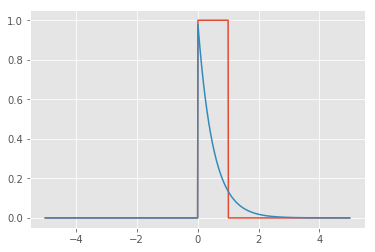

In [33]:
x = np.arange(-5, 5, 0.01)

pyplot.plot(x, f(x), label='$f_1(t)$')
pyplot.plot(x, g(x), label='$f_2(t)$')

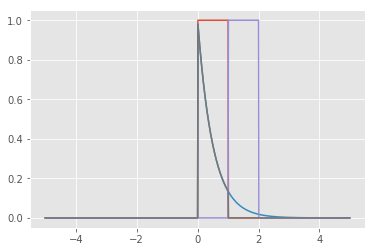

In [34]:
pyplot.figure()
pyplot.plot(x, f(x), label=r'$f(t)$')
pyplot.plot(x, g(x), label=r'$g(t)$')
pyplot.plot(x, flip(2, x), label=r'$f(x-t)$')
pyplot.plot(x, product(x), label=r'$f(x-t)g(t)$')
pyplot.show()

In [ ]:
def showConvolution(f, g, x):
    # 利用数值积分计算各个卷积值
    convolution = np.zeros(len(x))
    for n, t in enumerate(x):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    
    plt.subplot(211)
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    
    # plot the convolution curve
    plt.subplot(212)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point

In [2]:
# 调用 Mathematica
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()